In [81]:
import pandas as pd
import numpy as np
import os
PATH = "/home/tuandinh/Desktop/ML and AI/Master Machine Learning/datasets/housing_data/housing.csv"
def load_data(path = PATH):
    data = pd.read_csv(PATH)
    return data
IMAGES_PATH = "/home/tuandinh/Desktop/ML and AI/Master Machine Learning/images"
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [53]:
housing = load_data(PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [54]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [55]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [56]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [57]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


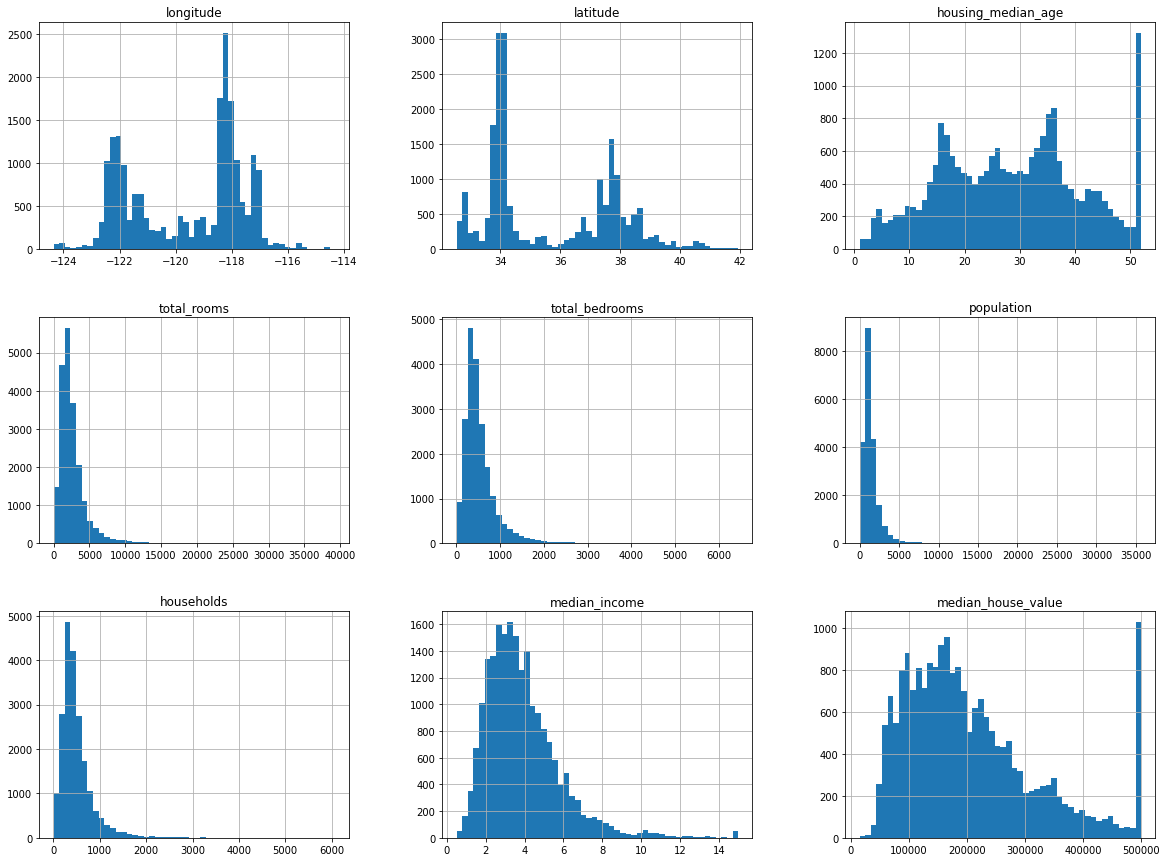

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

**Create a test set**

+ Theo thời gian, bạn (hoặc các thuật toán Học máy của bạn) sẽ thấy toàn bộ tập dữ liệu, đó là điều bạn muốn tránh.
Một giải pháp là lưu bộ thử nghiệm trong lần chạy đầu tiên và sau đó tải nó trong các lần chạy tiếp theo. Một tùy chọn khác là đặt hạt giống của trình tạo số ngẫu nhiên (ví dụ: np.ran dom.seed (42)) 12 trước khi gọi np.random.permutation (), để nó luôn tạo ra các chỉ số xáo trộn giống nhau.

In [59]:
np.random.seed(42)

In [60]:
# Using train_test_split in laibrary scikit-learn
from sklearn.model_selection import train_test_split

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # Hoán vị ngẫu nhiên một dãy hoặc trả về một dãy đã hoán vị.
    test_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_size] # lay tu dau den test size
    train_indices = shuffled_indices[test_size:] # lay tu test_size den het
    return data.iloc[train_indices], data.iloc[test_indices]

In [61]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), " train",len(test_set), " test" )

16512  train 4128  test


### **TOPICS**
> + Chia test_data sao cho các lần chạy dữ liệu trong tập test không chứa bất kì trường hợp nào đã có trong tập training_tata
> + Hai giải pháp chia dữ liệu trên có điểm thiếu sót nếu bạn thêm dât mới (update) lại dataset, tức là khi bạn có các dữ liệu mới 
> + Cần phải đảm bảo làm sao dữ liệu nhất quán trên nhiều lần chạy
> 
> **Giải pháp phổ biến:**
   > + bạn có thể tính toán một băm của số nhận dạng của từng cá thể, chỉ giữ lại byte cuối cùng của mã băm và đặt đối tượng đó vào tập hợp thử nghiệm nếu giá trị này thấp hơn hoặc bằng 51 (~ 20% của 256)
   > + sử dụng số nhận dạng của từng cá thể để quyết định xem nó có nên xuất hiện trong tập thử nghiệm hay không (giả sử các cá thể có một số nhận dạng duy nhất và không thể thay đổi)
   > + Tập hợp thử nghiệm mới sẽ chứa 20% các trường hợp mới, nhưng nó sẽ không chứa bất kỳ trường hợp nào trước đó đã có trong tập huấn luyện.

> **Here is a possible implementation:**

In [62]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio # digest() : Returns the encoded data in byte format.

'''def split_train_test_by_id(data, test_ratio, id_column, hash= hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set, data.loc[in_test_set]] '''


'def split_train_test_by_id(data, test_ratio, id_column, hash= hashlib.md5):\n    ids = data[id_column]\n    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))\n    return data.loc[~in_test_set, data.loc[in_test_set]] '

### The method more quickly below

In [63]:
from zlib import crc32

def test_set_check(indetifier, test_ratio):
    return crc32(np.int64(indetifier)) & 0xffffffff < test_ratio * 2 ** 32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

> + Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is **train_test_split**, which does pretty much the same thing as the function split_train_test defined earlier, with a couple of additional
features.
> + It's like the first method I created

In [64]:
# The simplest solution is to use the row index as the ID:
# Them cot index
housing_with_id = housing.reset_index() ## adds an 'index' column
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [65]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [66]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [67]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


> + ***Để không bị thiên lệch do thu nhập của một sô ngưoif trên 60000$ là không nhiều ta nhóm chúng thành 1 feature mới là ngưoif có thu nhập trên 50000$. Điều này gíup model của chúng ta có cái nhìn đúng đăn hơn và không bị thiên lệch***

+ pandas.cut - Sử dụng cắt khi bạn cần phân đoạn và sắp xếp các giá trị dữ liệu vào các thùng. Hàm này cũng hữu ích để chuyển từ một biến liên tục sang một biến phân loại. Ví dụ: việc cắt giảm có thể chuyển đổi độ tuổi thành các nhóm độ tuổi. Hỗ trợ đóng thùng vào một số lượng thùng bằng nhau hoặc một dãy thùng được chỉ định trước.

In [68]:
housing["income_cat"] = pd.cut(housing["median_income"],
                        bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                        labels=[1,2,3,4,5])
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [69]:
# Xem cac khonag da dong deu hay chua
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

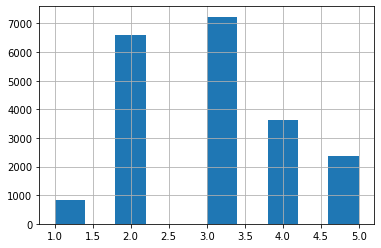

In [70]:
housing["income_cat"].hist()

### **This Link: [Lấy mẫu ngẫu nhiên phân tầng](https://www.investopedia.com/terms/stratified_random_sampling.asp#:~:text=Stratified%20random%20sampling%20is%20a,as%20income%20or%20educational%20attainment.)**

In [74]:
# stratified sampling based on the income category. For this use Scikit-Learn’s StratifiedShuffleSplit class:
# Lấy mẫu phân tầng dựa trên danh mục thu nhập.
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [72]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [73]:
# Remove the income_cat attribute so the data is back to its original state:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### II. Discover and Visualize the Data to Gain Insights

In [75]:
housing = strat_train_set.copy()


#### Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

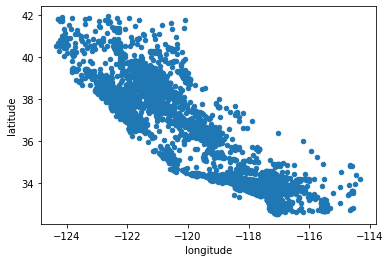

In [78]:
housing.plot(kind="scatter", x="longitude", y= "latitude" )

+ hình dung những nơi có mật độ điểm dữ liệu cao

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

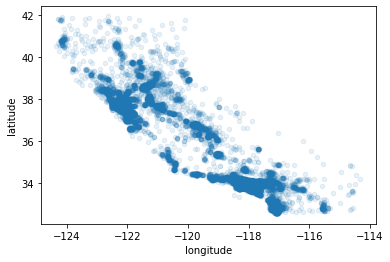

In [79]:
housing.plot(kind="scatter", x="longitude", y= "latitude" , alpha=0.1)

Saving figure housing_prices_scatterplot


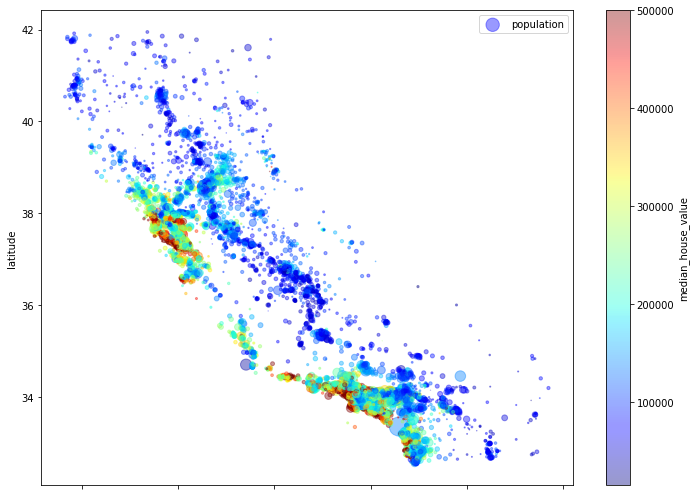

In [82]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
save_fig("housing_prices_scatterplot")